In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib import rcParams

# Ignore warnings
warnings.simplefilter('ignore')

# Load the dataset
df=pd.read_csv("mymoviedb.csv",lineterminator='\n')

# Display the first five rows of the dataset
df.head()


# Set the size of the plot
rcParams['figure.figsize'] = (16,6)

# Set the line style for the plots
sns.set_style('darkgrid')
plt.style.use('ggplot')

In [2]:
# Display the shape and information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [3]:
# Check for duplicate rows
df.duplicated().sum()

0

In [4]:
# Convert the 'Release_Date' column to datetime format and extract the year and the month
df["Release_Date"]=pd.to_datetime(df["Release_Date"],format='%Y-%m-%d')
df["Year"]=df["Release_Date"].dt.strftime('%Y')
df["Month"]=df["Release_Date"].dt.strftime('%m')

In [5]:
#Drop 'Overview' and 'Poster_Url' columns
df = df.drop(columns=['Overview','Poster_Url','Release_Date'])

In [6]:
# Describe the 'Popularity' column
df["Popularity"].describe()

count    9827.000000
mean       40.326088
std       108.873998
min        13.354000
25%        16.128500
50%        21.199000
75%        35.191500
max      5083.954000
Name: Popularity, dtype: float64

In [7]:
# Select top 10 popular movies
popular_movies=df.loc[df['Popularity'] >= 1501, ['Title', 'Popularity', 'Genre']]

# Display the popular movies
popular_movies

,Title,Popularity,Genre
0,Spider-Man: No Way Home,5083.954,"Action, Adventure, Science Fiction"
1,The Batman,3827.658,"Crime, Mystery, Thriller"
2,No Exit,2618.087,Thriller
3,Encanto,2402.201,"Animation, Comedy, Family, Fantasy"
4,The King's Man,1895.511,"Action, Adventure, Thriller, War"
5,The Commando,1750.484,"Action, Crime, Thriller"
6,Scream,1675.161,"Horror, Mystery, Thriller"
7,Kimi,1601.782,Thriller
8,Fistful of Vengeance,1594.013,"Action, Crime, Fantasy"
9,Eternals,1537.406,Science Fiction


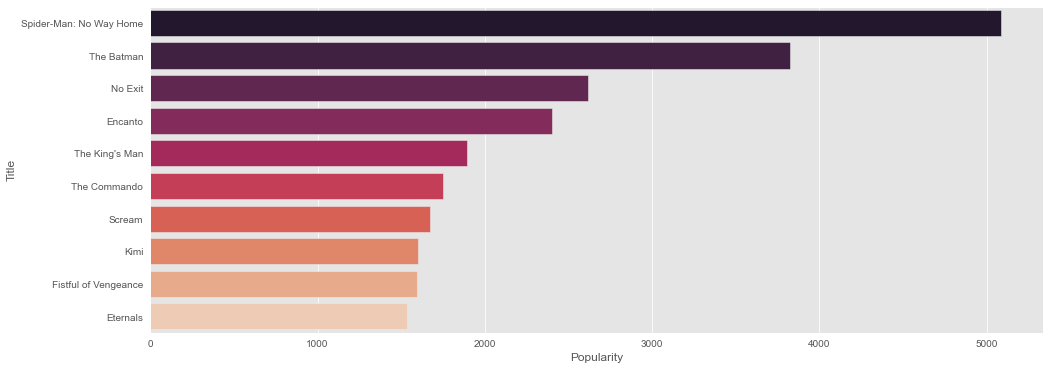

In [8]:
# Create a bar plot of popular movies
sns.barplot(data=popular_movies,x='Popularity',y="Title",palette = 'rocket')
plt.show()

In [31]:
most_voted_movies = df[(df['Vote_Count'] >= 1000) & (df['Popularity'] >= 30)]
#Get the top rated movies that have popularity and actual votes
top_rated_movies = most_voted_movies.sort_values(['Vote_Average',  'Vote_Count','Popularity'], ascending=[False, False, False]).head(20)
top_rated_movies=top_rated_movies.reset_index(drop=True)
top_rated_movies

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Year,Month
0,The Shawshank Redemption,87.669,20911,8.7,en,"[Drama, Crime]",1994,09
1,The Godfather,93.136,15614,8.7,en,"[Drama, Crime]",1972,03
2,Schindler's List,55.225,12474,8.6,en,"[Drama, History, War]",1993,11
3,The Godfather: Part II,65.324,9393,8.6,en,"[Drama, Crime]",1974,12
4,The Dark Knight,173.923,26994,8.5,en,"[Drama, Action, Crime, Thriller]",2008,07
5,Pulp Fiction,55.352,22733,8.5,en,"[Thriller, Crime]",1994,09
6,Forrest Gump,62.636,22308,8.5,en,"[Comedy, Drama, Romance]",1994,07
7,The Lord of the Rings: The Return of the King,118.609,19183,8.5,en,"[Adventure, Fantasy, Action]",2003,12
8,The Green Mile,81.142,13604,8.5,en,"[Fantasy, Drama, Crime]",1999,12
9,Parasite,108.442,13240,8.5,ko,"[Comedy, Thriller, Drama]",2019,05


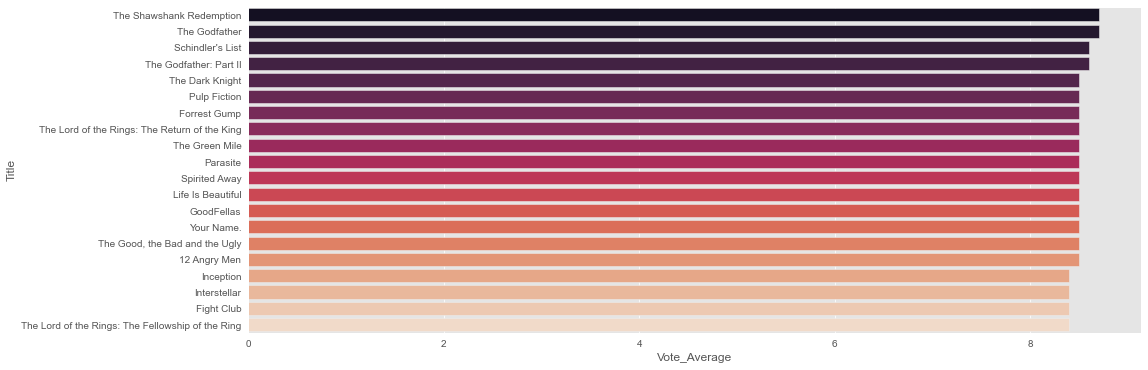

In [32]:
#plot the most popular top rated movies 
sns.barplot(data=top_rated_movies,y='Title',x="Vote_Average" ,palette = 'rocket')
plt.show()

In [30]:
#Most used languges in movies
language = df['Original_Language'].value_counts().sort_values(ascending=False)
language.head(10)

en    7570
ja     645
es     339
fr     292
ko     170
zh     129
it     123
cn     109
ru      83
de      82
Name: Original_Language, dtype: int64

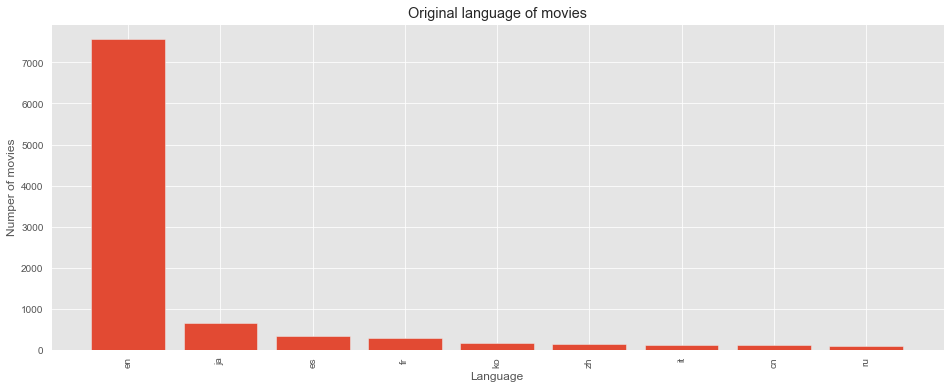

In [12]:
#plot original language vs number of movies 
plt.bar(language.index[0:9], language.values[0:9])
plt.xticks(rotation=90)
plt.title('Original language of movies')
plt.xlabel('Language')
plt.ylabel('Numper of movies')
plt.show()

In [13]:
# Count the number of movies released in each year
df["Year"].value_counts()

2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
1902      1
1920      1
2024      1
1929      1
1930      1
Name: Year, Length: 102, dtype: int64

<AxesSubplot:>

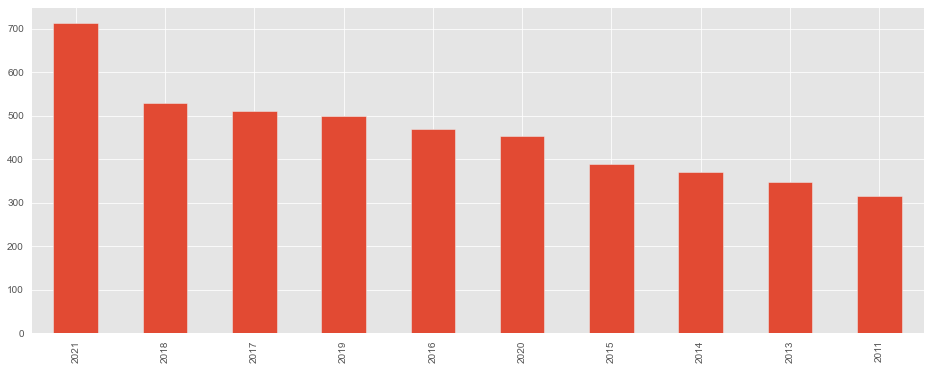

In [14]:
# Create a bar plot of the top 10 release dates by count
df["Year"].value_counts().head(10).plot(kind='bar')

In [15]:
# Count the number of movies released in each month
df["Month"].value_counts()

10    1024
09     993
12     927
08     885
03     868
07     802
11     789
02     788
06     768
04     669
05     665
01     649
Name: Month, dtype: int64

<AxesSubplot:>

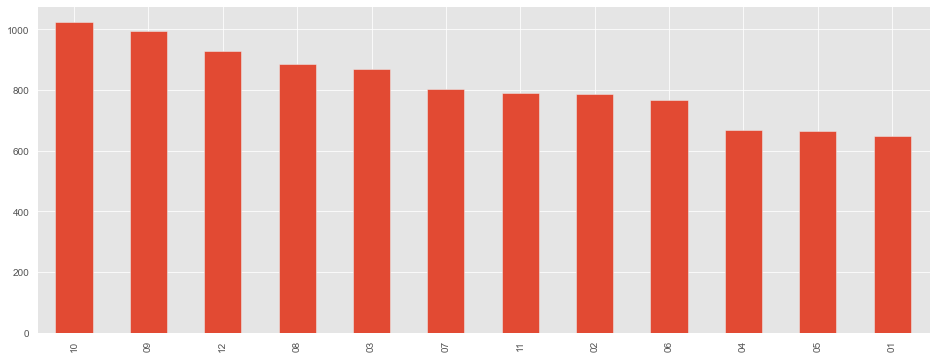

In [16]:
# Create a bar plot (no.filmsreleased vs month)
df["Month"].value_counts().plot(kind='bar')

In [17]:
# Split the 'Genre' column into separate genres and create a new row for each genre
df['Genre']=df['Genre'].apply(lambda x:x.split(','))
Genre_df = df.explode('Genre')

# Strip leading and trailing spaces from the 'Genre' column
Genre_df['Genre'] = Genre_df['Genre'].str.strip()

# Count the number of movies in each genre
Genre_conts=Genre_df['Genre'].value_counts()

# Create a DataFrame of genre counts
Genre_conts_df = pd.DataFrame({'Genre':Genre_conts.index,'Count':Genre_conts.values})

# Display the genre counts
Genre_conts_df

,Genre,Count
0,Drama,3744
1,Comedy,3031
2,Action,2686
3,Thriller,2488
4,Adventure,1853
5,Romance,1476
6,Horror,1470
7,Animation,1439
8,Family,1414
9,Fantasy,1308


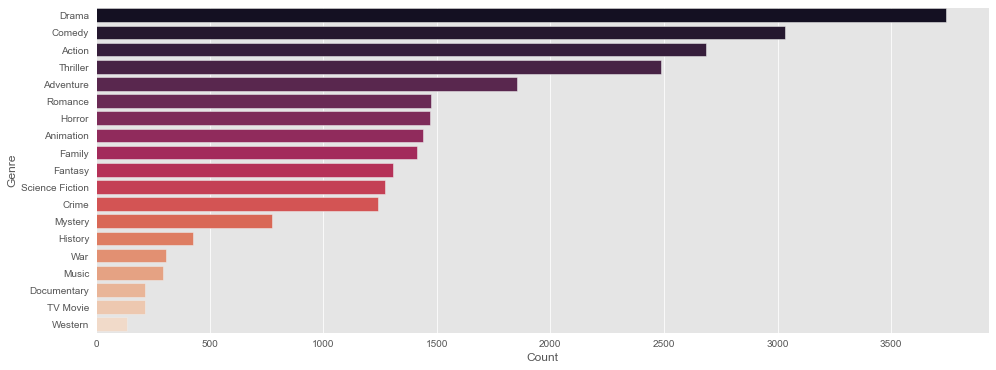

In [18]:
# Create a bar plot of movie counts by genre
sns.barplot(data=Genre_conts_df,x='Count',y="Genre",palette = "rocket")
plt.show()

In [19]:
# Calculate the average rating for each genre
genre_averages = Genre_df.groupby('Genre').Vote_Average.mean().sort_values(ascending=False)

# Display the average ratings for each genre
genre_averages

Genre
History            6.965574
War                6.948701
Music              6.879322
Animation          6.846560
Western            6.754745
Drama              6.706143
Documentary        6.663721
Family             6.581047
Romance            6.560772
Crime              6.552013
Fantasy            6.526300
Adventure          6.456719
TV Movie           6.438318
Mystery            6.434282
Comedy             6.382976
Action             6.330268
Science Fiction    6.257423
Thriller           6.246141
Horror             5.940068
Name: Vote_Average, dtype: float64

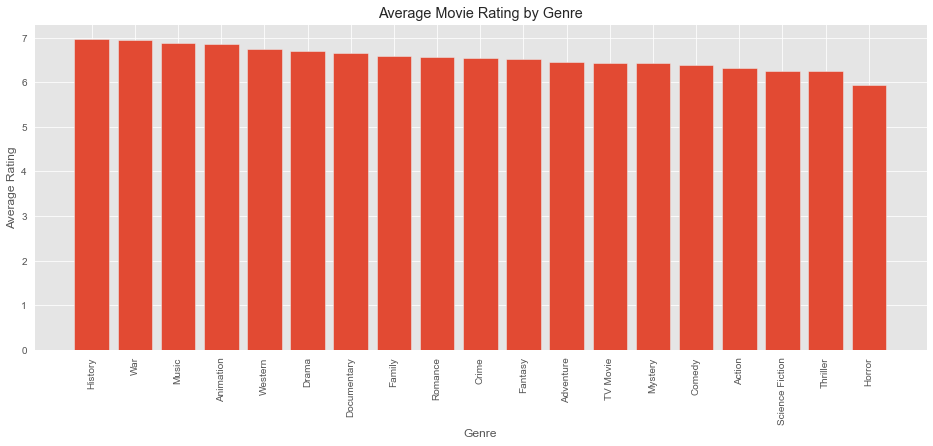

In [20]:
# Create a bar plot of genre ratings
plt.bar(genre_averages.index, genre_averages.values)
plt.xticks(rotation=90)
plt.title('Average Movie Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

In [21]:
# Select movies with a popularity score of 13.36 or lower
less_popular_movies=df.loc[df['Popularity'] <= 13.36, ['Title', 'Popularity', 'Genre']]

# Sort the less popular movies by popularity score in ascending order
less_popular_movies = less_popular_movies.sort_values(by=['Popularity'])

# Display the less popular movies
less_popular_movies

,Title,Popularity,Genre
9825,The United States vs. Billie Holiday,13.354,"[Music, Drama, History]"
9826,Threads,13.354,"[War, Drama, Science Fiction]"
9824,The Offering,13.355,"[Mystery, Thriller, Horror]"
9823,Violent Delights,13.356,[Horror]
9821,The Little Prince,13.357,"[Science Fiction, Fantasy, Family, Music]"
9822,Badlands,13.357,"[Drama, Crime]"
9820,Unlawful Entry,13.358,"[Crime, Thriller, Mystery]"
9818,All Is Lost,13.359,"[Action, Adventure, Drama]"
9819,Amateur Porn Star Killer 2,13.359,"[Crime, Horror]"
9817,I'm in Love With My Little Sister,13.360,"[Romance, Animation, Drama]"


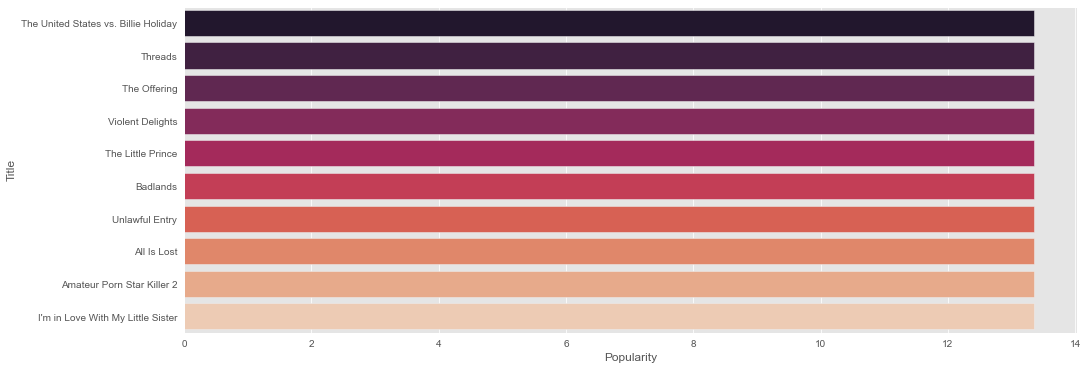

In [22]:
# Create a bar plot of less popular movies by title and popularity score
sns.barplot(data=less_popular_movies,x='Popularity',y="Title",palette = 'rocket')
plt.show()

# ANSWER OF THE QUESTIONS

What is the movie with the highest Popularity rate? And what kind is it?

In [23]:
print("The movie with the highest popularity rate is:", popular_movies['Title'][0])
print("The genre of the movie is:", popular_movies['Genre'][0])

The movie with the highest popularity rate is: Spider-Man: No Way Home
The genre of the movie is: Action, Adventure, Science Fiction


What year was the largest number of films produced?

In [24]:
print("The year with the largest film production is:", df["Year"].value_counts().index[0])

The year with the largest film production is: 2021


What is most of the film genre?

In [25]:
print("The most genre of films is:", Genre_conts_df['Genre'][0])

The most genre of films is: Drama


What kind of movies take the highest rating?

In [26]:
print("The movie genre with the hiest rate is:", genre_averages.index[0])

The movie genre with the hiest rate is: History


Which movie is more popular? Which movie is less popular

In [27]:
print("The movie with the highest popularity rate is:", popular_movies['Title'][0])
print("The movie with the worst popularity rate are:", less_popular_movies['Title'][9825],'AND',less_popular_movies['Title'][9826])

The movie with the highest popularity rate is: Spider-Man: No Way Home
The movie with the worst popularity rate are: The United States vs. Billie Holiday AND Threads
